## Importing the Packages

In [519]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
sns.set()

## Task 1: Merging 12 months of sales data into a single CSV file

In [520]:
files = [file for file in os.listdir("./Sales_Data")]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)


### Read in updated dataframe

In [543]:
all_data = pd.read_csv("all_data.csv")
all_data.shape

(186850, 6)

## Task 2: Cleaning the dataset 

### Deleting nan rows

In [522]:
#all the nan are empty rows
all_data = all_data.dropna()

### Rename first column

In [523]:
col_str =[]
for col_i in all_data.columns:
    col_i = col_i.replace(" ","_")
    col_str.append(col_i)
all_data.columns = col_str
all_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

### Find 'Or' and delete it

In [524]:
all_data = all_data[all_data['Order_Date'].str[:2] != 'Or']
type(all_data)

pandas.core.frame.DataFrame

### Convert columns to the correct type

In [525]:
all_data['Quantity_Ordered'] = pd.to_numeric(all_data['Quantity_Ordered']) #make int
all_data['Price_Each'] = pd.to_numeric(all_data['Price_Each']) #make float

##  Task 3: Add sales & month columns

In [526]:
all_data.insert(4, "Sales", all_data["Quantity_Ordered"] * all_data["Price_Each"])
all_data.insert(6, "Month", all_data["Order_Date"].str[:2].astype("int32"))


##  Task 4: Add city column

In [527]:
all_data["City"] = all_data["Purchase_Address"].apply(lambda x: x.split(',')[1])
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Sales,Order_Date,Month,Purchase_Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles


## Question 1 : What was the best month for sales ? How much was earned that month?

In [528]:
results = all_data.groupby('Month').sum()
months = range(1,13)

results

,Quantity_Ordered,Price_Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


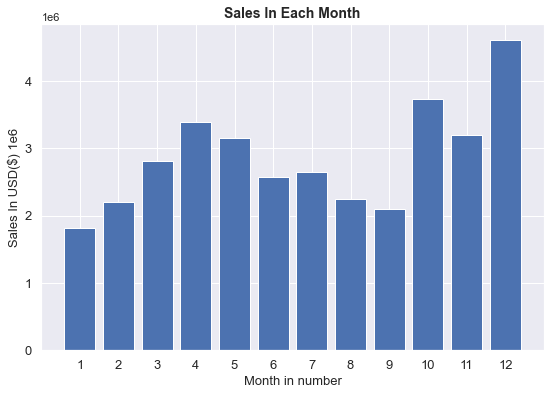

In [529]:
plt.figure(figsize = (9 , 6))
plt.xticks(months, fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title("Sales In Each Month",
              fontsize = 14,
              fontweight = 'bold')
plt.xlabel("Month in number", fontsize = 13)
plt.ylabel("Sales In USD($) 1e6", fontsize = 13)
plt.bar(months, results['Sales'])
plt.show()

## Question 2: What city had the highet number of sales?

In [530]:
city_sales = all_data.groupby('City').sum()
cities = all_data["City"].unique().tolist()
cities.sort()
city_sales

,Quantity_Ordered,Price_Each,Sales,Month
City,,,,
Atlanta,16602,2779908.20,2795498.58,104794
Austin,11153,1809873.61,1819581.75,69829
Boston,22528,3637409.77,3661642.01,141112
Dallas,16730,2752627.82,2767975.40,104620
Los Angeles,33289,5421435.23,5452570.80,208325
New York City,27932,4635370.83,4664317.43,175741
Portland,14053,2307747.47,2320490.61,87765
San Francisco,50239,8211461.74,8262203.91,315520
Seattle,16553,2733296.01,2747755.48,104941


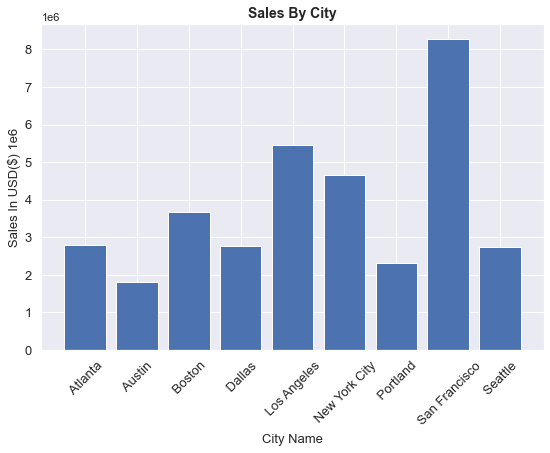

In [531]:
plt.figure(figsize = (9 , 6))
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title("Sales By City",
              fontsize = 14,
              fontweight = 'bold')
plt.xlabel("City Name", fontsize = 13)
plt.ylabel("Sales In USD($) 1e6", fontsize = 13)
plt.bar(cities, city_sales['Sales'])
plt.show()

## Question 3: What time should we display adversiments to maximize likelihood of costumer's buying product?

In [532]:
all_data['Order_Date'] = pd.to_datetime(all_data['Order_Date']) # Change the time format to date time

all_data["Hour"] = all_data["Order_Date"].dt.hour # insert hour column

all_data["Minute"] = all_data["Order_Date"].dt.minute # insert minute column

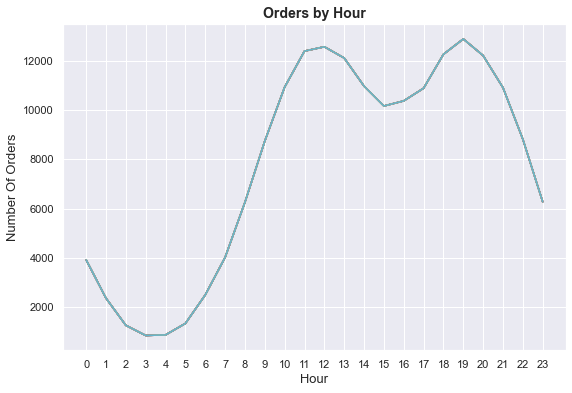

In [533]:
hours = [hour for hour, df in all_data.groupby('Hour')]
orders = all_data.groupby(['Hour']).count() # count how many rows for each hour = orders per hour

plt.figure(figsize = (9 , 6))
plt.plot(hours, orders)
plt.title("Orders by Hour",
              fontsize = 14,
              fontweight = 'bold')
plt.xlabel("Hour", fontsize = 13)
plt.ylabel("Number Of Orders", fontsize = 13)
plt.xticks(hours)

plt.show()

## Question 4: What products are most often sold together

In [534]:
df = all_data[all_data["Order_ID"].duplicated(keep= False)] # create temp dataframe that contains all duplicates

df["Grouped"] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x)) # Add grouped column that sum the product names

df = df[['Order_ID', 'Grouped']].drop_duplicates() # drop suplicates

df.head()

C:\Users\user\AppData\Local\Temp/ipykernel_11196/3058547807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x)) # Add grouped column that sum the product names


,Order_ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [535]:
# Generate table of 10 most common combinations
from itertools import combinations
from collections import Counter

mostcommon = []
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    df1 = [[key[0],key[1]], value]
    mostcommon.append(df1)
mostcommon

[[['iPhone', 'Lightning Charging Cable'], 1005],
 [['Google Phone', 'USB-C Charging Cable'], 987],
 [['iPhone', 'Wired Headphones'], 447],
 [['Google Phone', 'Wired Headphones'], 414],
 [['Vareebadd Phone', 'USB-C Charging Cable'], 361],
 [['iPhone', 'Apple Airpods Headphones'], 360],
 [['Google Phone', 'Bose SoundSport Headphones'], 220],
 [['USB-C Charging Cable', 'Wired Headphones'], 160],
 [['Vareebadd Phone', 'Wired Headphones'], 143],
 [['Lightning Charging Cable', 'Wired Headphones'], 92]]

## Question 5: What product sold the most ?

In [536]:
product_sales = all_data.groupby('Product').sum()

quan_ordered = product_sales["Quantity_Ordered"].sort_values(axis=0)
quan_ordered[0:10]

Product
LG Dryer                   646
LG Washing Machine         666
Vareebadd Phone           2068
20in Monitor              4129
ThinkPad Laptop           4130
Macbook Pro Laptop        4728
Flatscreen TV             4819
Google Phone              5532
34in Ultrawide Monitor    6199
27in 4K Gaming Monitor    6244
Name: Quantity_Ordered, dtype: int64

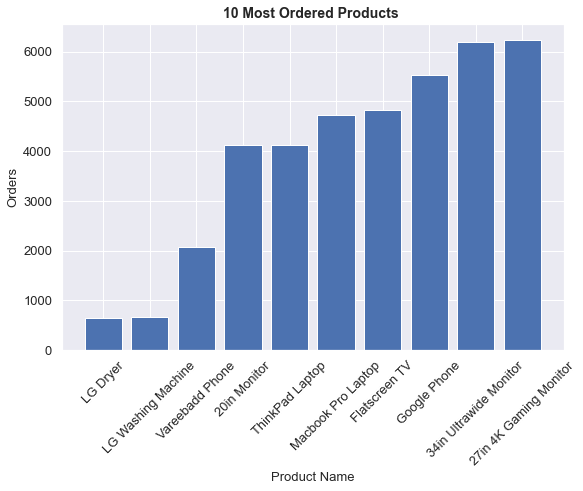

In [537]:
plt.figure(figsize = (9 , 6))
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13) 
plt.title("10 Most Ordered Products ",
              fontsize = 14,
              fontweight = 'bold')
plt.xlabel("Product Name", fontsize = 13)
plt.ylabel("Orders", fontsize = 13)
plt.bar(quan_ordered[0:10].index, quan_ordered[0:10])
plt.show()

In [539]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Sales,Order_Date,Month,Purchase_Address,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles,9,27


In [538]:
sum_of_sales = product_sales["Sales"].sort_values(axis=0, ascending=False)
sum_of_sales[0:10].astype(np.int64)


Product
Macbook Pro Laptop            8037600
iPhone                        4794300
ThinkPad Laptop               4129958
Google Phone                  3319200
27in 4K Gaming Monitor        2435097
34in Ultrawide Monitor        2355558
Apple Airpods Headphones      2349150
Flatscreen TV                 1445700
Bose SoundSport Headphones    1345565
27in FHD Monitor              1132424
Name: Sales, dtype: int64